Importing Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [7]:
df = pd.read_csv("data/linkedin reviews.csv", encoding = 'ISO-8859-1')

Number of rows and columns

In [8]:
df.shape

(702, 2)

Access first five rows

In [9]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


Access last five rows

In [10]:
df.tail()

,Review,Rating
697,"Can't trust, Going to uninstall just for that ...",1
698,It really gets me linked in with my friends. H...,5
699,It lacks most of what makes the other social n...,4
700,Really disappointed in the new version. Seems ...,2
701,One of the best looking and well designed apps...,5


Displaying total columns from Dataset

In [11]:
df.columns

Index(['Review', 'Rating'], dtype='object')

DataFrame information

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


Plotting the distribution of ratings

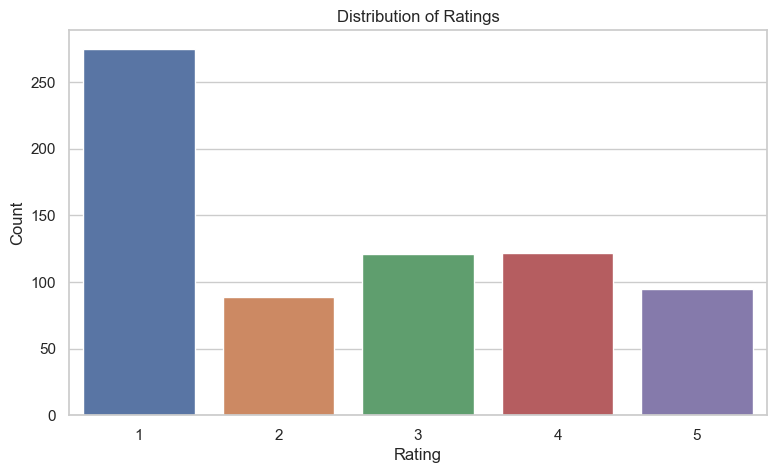

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(9, 5))
sns.countplot(data=df, x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Calculating the length of each review

In [16]:
df['Review Length'] = df['Review'].apply(len)

Plotting the distribution of review lengths

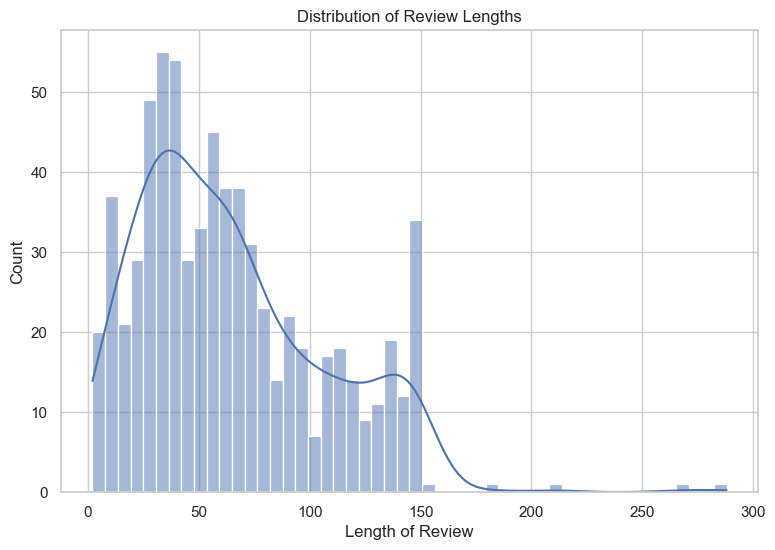

In [17]:
plt.figure(figsize=(9, 6))
sns.histplot(df['Review Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

Let’s proceed to label the dataset using TextBlob for sentiment analysis

In [20]:
from textblob import TextBlob

In [21]:
def textblob_sentiment_analysis(review):
    # Analyzing the sentiment of the review
    sentiment = TextBlob(review).sentiment
    # Classifying based on polarity
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

Applying TextBlob sentiment analysis to the reviews

In [22]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

Displaying the first few rows with the sentiment

In [23]:
df.head()

,Review,Rating,Review Length,Sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Neutral
2,Slow and it tries to upload your contacts with...,1,61,Negative
3,Add ability to customize the profile and move ...,4,90,Neutral
4,"Good app, but it's a pain that it's not possib...",4,133,Positive


Analyzing the distribution of sentiments

In [24]:
sentiment_distribution = df['Sentiment'].value_counts()

Plotting the distribution of sentiments

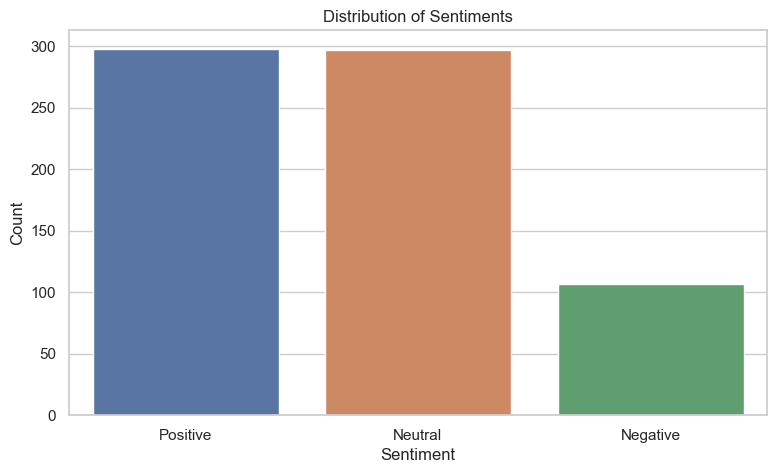

In [25]:
plt.figure(figsize=(9, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

the relationship between the sentiments and the ratings

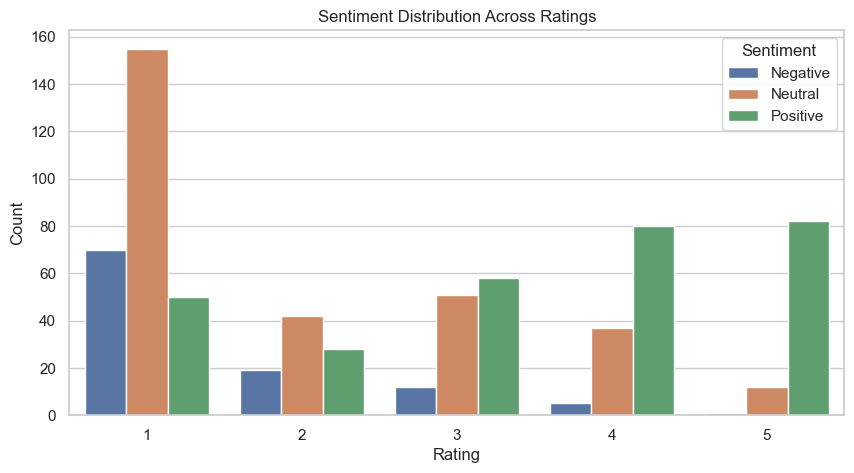

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Rating', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

perform a text analysis to identify common words or themes within each sentiment category

In [27]:
from wordcloud import WordCloud

Function to generate word cloud for each sentiment

In [30]:
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in df[df['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

Generating word clouds for each sentiment

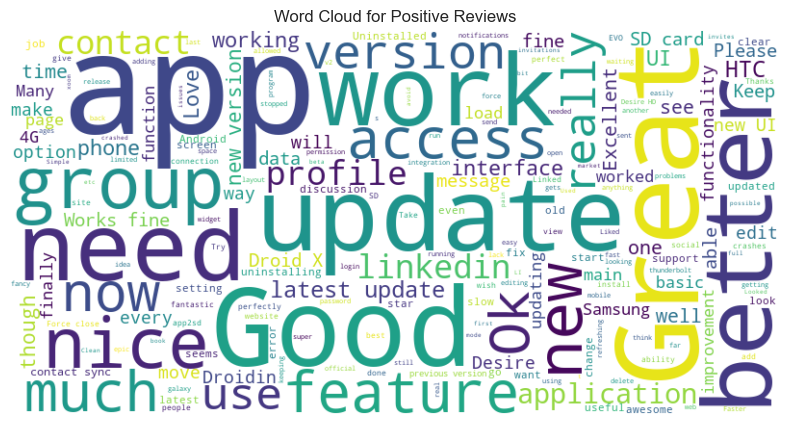

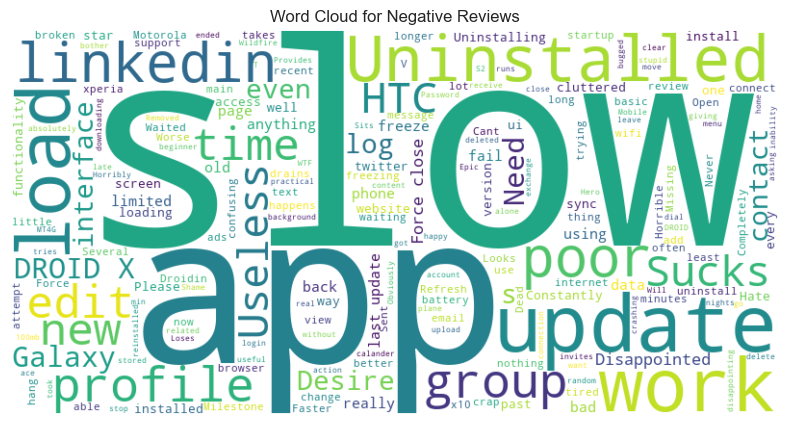

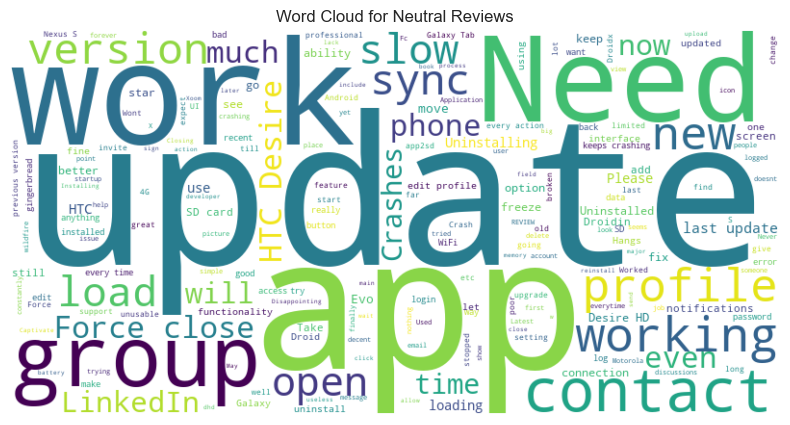

In [31]:
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)

Summary

So, App Reviews Sentiment Analysis is a valuable tool for app
developers and businesses to understand user feedback, prioritize
feature updates, and maintain a positive user community. It involves
using data analysis techniques to determine whether the sentiments in
these reviews are positive, negative, or neutral. I hope you liked this
article on App Reviews Sentiment Analysis using Python. Feel free to
ask valuable questions in the comments section below.